In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

In [2]:
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
outliers = np.random.uniform(low=-8, high=8, size=(20, 2))  # Add 20 outliers
X = np.concatenate((X, outliers), axis=0)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [4]:
distances = np.linalg.norm(X_scaled - kmeans.cluster_centers_[labels], axis=1) #euclidean distance.
threshold = np.percentile(distances, 95)  # 95th percentile as threshold

anomalies = X[distances > threshold]
anomaly_indices = np.where(distances > threshold)[0]

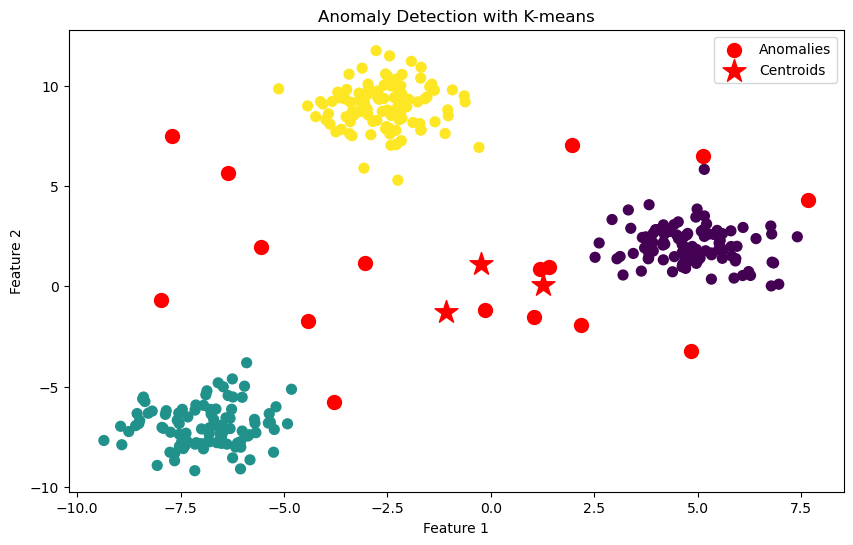

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', s=100, label='Anomalies')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('Anomaly Detection with K-means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [6]:
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

print("Anomaly Indices:", anomaly_indices)

Silhouette Score: 0.810
Anomaly Indices: [ 63 188 300 301 303 304 307 308 309 310 311 313 314 315 316 317]
